In [1]:
words = [
    "Deepak",
    "Shiva",
    "Ram",
    "Vinshu",
    "Bhramha",
    "Krishna",
    "Hanuman",
    "Ganesh",
    "Zidus",
    "parashuram",
    "sitaram",
    "radheshyam",
    "fal",
    "xmen",
    "cat",
    "jamwant",
    "omkar",
    "quality",
    "bajrangbali",
    "pavansut",
    "anjaniputra"
]

words = [word.lower() for word in words]

words[:3]

['deepak', 'shiva', 'ram']

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# build vocab and mapping
chars = sorted(list(set("".join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [4]:
# build data set
block_size = 3 # context window
X, Y = [], []
for w in words[:5]:
    print(w)

    context = [0]*block_size
    for ch in w + ".":
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '----->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)


deepak
... -----> d
..d -----> e
.de -----> e
dee -----> p
eep -----> a
epa -----> k
pak -----> .
shiva
... -----> s
..s -----> h
.sh -----> i
shi -----> v
hiv -----> a
iva -----> .
ram
... -----> r
..r -----> a
.ra -----> m
ram -----> .
vinshu
... -----> v
..v -----> i
.vi -----> n
vin -----> s
ins -----> h
nsh -----> u
shu -----> .
bhramha
... -----> b
..b -----> h
.bh -----> r
bhr -----> a
hra -----> m
ram -----> h
amh -----> a
mha -----> .


In [5]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [6]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  4],
        [ 0,  4,  5],
        [ 4,  5,  5],
        [ 5,  5, 16],
        [ 5, 16,  1],
        [16,  1, 11],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19,  8],
        [19,  8,  9],
        [ 8,  9, 22],
        [ 9, 22,  1],
        [ 0,  0,  0],
        [ 0,  0, 18],
        [ 0, 18,  1],
        [18,  1, 13],
        [ 0,  0,  0],
        [ 0,  0, 22],
        [ 0, 22,  9],
        [22,  9, 14],
        [ 9, 14, 19],
        [14, 19,  8],
        [19,  8, 21],
        [ 0,  0,  0],
        [ 0,  0,  2],
        [ 0,  2,  8],
        [ 2,  8, 18],
        [ 8, 18,  1],
        [18,  1, 13],
        [ 1, 13,  8],
        [13,  8,  1]])

In [7]:
Y

tensor([ 4,  5,  5, 16,  1, 11,  0, 19,  8,  9, 22,  1,  0, 18,  1, 13,  0, 22,
         9, 14, 19,  8, 21,  0,  2,  8, 18,  1, 13,  8,  1,  0])

In [8]:
C = torch.randn((27,2))

In [9]:
C[5]

tensor([0.4686, 0.5434])

In [10]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([0.4686, 0.5434])

In [13]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [23]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)


In [24]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [17]:
#emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]

emb[:, 0, :].shape

torch.Size([32, 2])

In [19]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [20]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [21]:
emb.view(32,6) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [25]:
emb.view(emb.shape[0], 6) @ W1 + b1

tensor([[ 3.2740,  0.3643,  1.9664,  ..., -0.3460, -1.2026,  0.9262],
        [-0.2784,  3.5312, -0.1782,  ...,  6.6058, -2.3961,  0.5982],
        [ 0.2800, -0.7615,  2.2049,  ...,  5.3064, -1.8976, -4.8345],
        ...,
        [ 1.4465, -2.1044,  0.0989,  ..., -2.6315, -2.1198, -0.9605],
        [ 2.5155,  0.4175, -1.1848,  ..., -1.9353, -0.6699,  1.3537],
        [-1.7243,  1.8895,  0.9918,  ...,  3.4983, -5.7962,  0.7140]])

In [27]:
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
h.shape

torch.Size([32, 100])

In [28]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

logits = h @ W2 + b2

In [29]:
logits.shape

torch.Size([32, 27])

In [30]:
counts = logits.exp()

In [31]:
probs = counts / counts.sum(1, keepdim=True)

In [32]:
probs.shape

torch.Size([32, 27])

In [34]:
Y, Y.shape

(tensor([ 4,  5,  5, 16,  1, 11,  0, 19,  8,  9, 22,  1,  0, 18,  1, 13,  0, 22,
          9, 14, 19,  8, 21,  0,  2,  8, 18,  1, 13,  8,  1,  0]),
 torch.Size([32]))

In [35]:
probs[torch.arange(32),Y]

tensor([1.0489e-05, 7.8658e-06, 9.2106e-13, 2.1945e-11, 1.8986e-06, 1.4327e-10,
        5.3425e-14, 2.0962e-01, 4.2376e-11, 2.0922e-14, 2.9758e-07, 4.2549e-04,
        7.3235e-07, 1.8022e-06, 3.3202e-01, 6.6152e-06, 3.3869e-18, 9.8227e-11,
        1.1144e-02, 2.9415e-01, 1.6573e-01, 1.5665e-12, 3.5680e-07, 1.3939e-06,
        8.1678e-04, 2.8569e-12, 4.9698e-05, 4.2941e-14, 3.2318e-08, 1.5463e-04,
        5.1233e-11, 3.2345e-06])

In [36]:
loss = -probs[torch.arange(32),Y].log().mean()
loss

tensor(16.4072)

In [67]:
# build data set
block_size = 3 # context window
X, Y = [], []
for w in words[:3]:
    print(w)

    context = [0]*block_size
    for ch in w + ".":
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '----->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

X.shape, Y.shape

deepak
... -----> d
..d -----> e
.de -----> e
dee -----> p
eep -----> a
epa -----> k
pak -----> .
shiva
... -----> s
..s -----> h
.sh -----> i
shi -----> v
hiv -----> a
iva -----> .
ram
... -----> r
..r -----> a
.ra -----> m
ram -----> .


(torch.Size([17, 3]), torch.Size([17]))

In [68]:
g = torch.Generator().manual_seed(1223345)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]


In [69]:
sum(p.nelement() for p in parameters)

3481

In [70]:
for p in parameters:
    p.requires_grad = True

In [71]:
lre = torch.linspace(-3,0, 1000)
lrs = 10**lre
#lrs

In [76]:
lri = []
lossi = []

for i in range(1000):

    # mini batch construt
    ix = torch.randint(0, X.shape[0], (32,))

    # forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    # counts = logits.exp()
    # probs = counts / counts.sum(1, keepdim=True)
    # loss = -probs[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Y[ix])
    #print(loss.item())
    # backward prop
    for p in parameters:
        p.grad = None
    loss.backward()

    # update 
    #lr = lrs[i]
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    #lri.append(lr)
    # lri.append(lre[i])
    # lossi.append(loss.item())




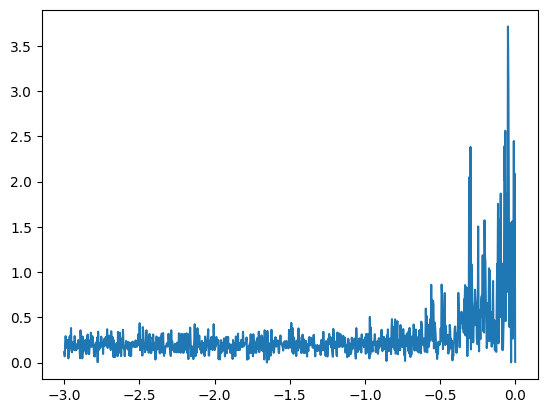

In [75]:
plt.plot(lri, lossi)

In [79]:
# build data set

def build_dataset(words):
    block_size = 3 # context window
    X, Y = [], []
    for w in words:
        #print(w)

        context = [0]*block_size
        for ch in w + ".":
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '----->', itos[ix])
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

In [86]:
import random
random.seed(42)
random.shuffle(words)
n1 = int(.8* len(words))
n2 = int(.9 * len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([120, 3]) torch.Size([120])
torch.Size([15, 3]) torch.Size([15])
torch.Size([24, 3]) torch.Size([24])


In [91]:
g = torch.Generator().manual_seed(1223345)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

In [106]:
stepi = []
lossi = []
for i in range(10000):

    # mini batch construt
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    # counts = logits.exp()
    # probs = counts / counts.sum(1, keepdim=True)
    # loss = -probs[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Ytr[ix])
    #print(loss.item())
    # backward prop
    for p in parameters:
        p.grad = None
    loss.backward()

    # update 
    #lr = lrs[i]
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
    stepi.append(i)
    lossi.append(loss.item())
    

In [107]:
loss.item()

0.45418664813041687

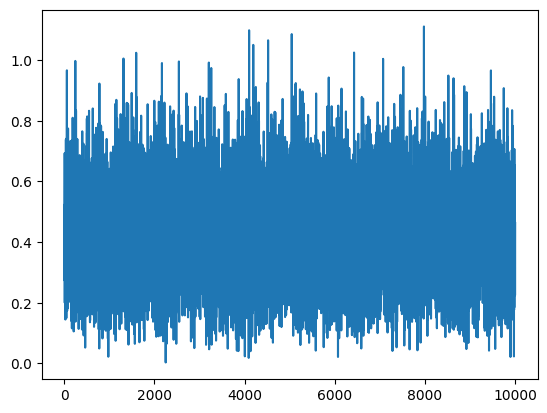

In [102]:
plt.plot(stepi, lossi)

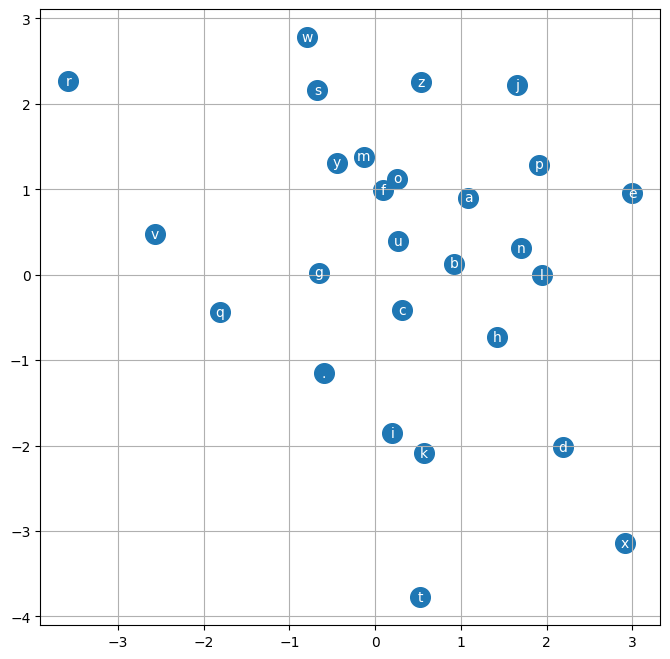

In [109]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")

plt.grid("minor")


In [108]:
# need to find Dev los and test loss

emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(8.8777, grad_fn=<NllLossBackward0>)